In [1]:
import os
import re
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df1 = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))
print(len(df1))
df2 = pd.read_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))
print(len(df2))
df = pd.concat([df1, df2])
df1, df2 = None, None

47195
17214


In [7]:
df

,rok,titul,autorstvo,autorstvo_kod
001,,,,
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522
...,...,...,...,...
nkc20243587118,2024.0,Poezie z předprvního šuplíku,Dvorská Lucie,None
nkc20243632368,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,o
nkc20243630870,2024.0,Rozervané řádky,Brabencová Kristýna,x


In [9]:
df = df[~df.index.duplicated(keep='first')]

In [11]:
len(df)

62866

In [15]:
df.groupby("rok").size()

rok
1802.0       2
1803.0       1
1804.0       4
1805.0       2
1807.0       2
1808.0       1
1810.0       3
1812.0       1
1813.0       4
1814.0       6
1815.0       2
1816.0       5
1817.0       6
1818.0       4
1819.0       9
1820.0       6
1821.0       7
1822.0       7
1823.0      11
1824.0      12
1825.0      17
1826.0       3
1827.0       4
1828.0       4
1829.0       5
1830.0      11
1831.0       8
1832.0       2
1833.0       4
1834.0       7
1835.0      11
1836.0      12
1837.0       7
1838.0       6
1839.0       2
1840.0       8
1841.0      15
1842.0      11
1843.0      18
1844.0      34
1845.0      23
1846.0      20
1847.0      22
1848.0      17
1849.0      18
1850.0      16
1851.0      16
1852.0      24
1853.0      19
1854.0      25
1855.0      24
1856.0      19
1857.0      26
1858.0      36
1859.0      27
1860.0      23
1861.0      37
1862.0      53
1863.0      47
1864.0      32
1865.0      31
1866.0      19
1867.0      28
1868.0      31
1869.0      38
1870.0      33
1871.0

<Axes: xlabel='rok'>

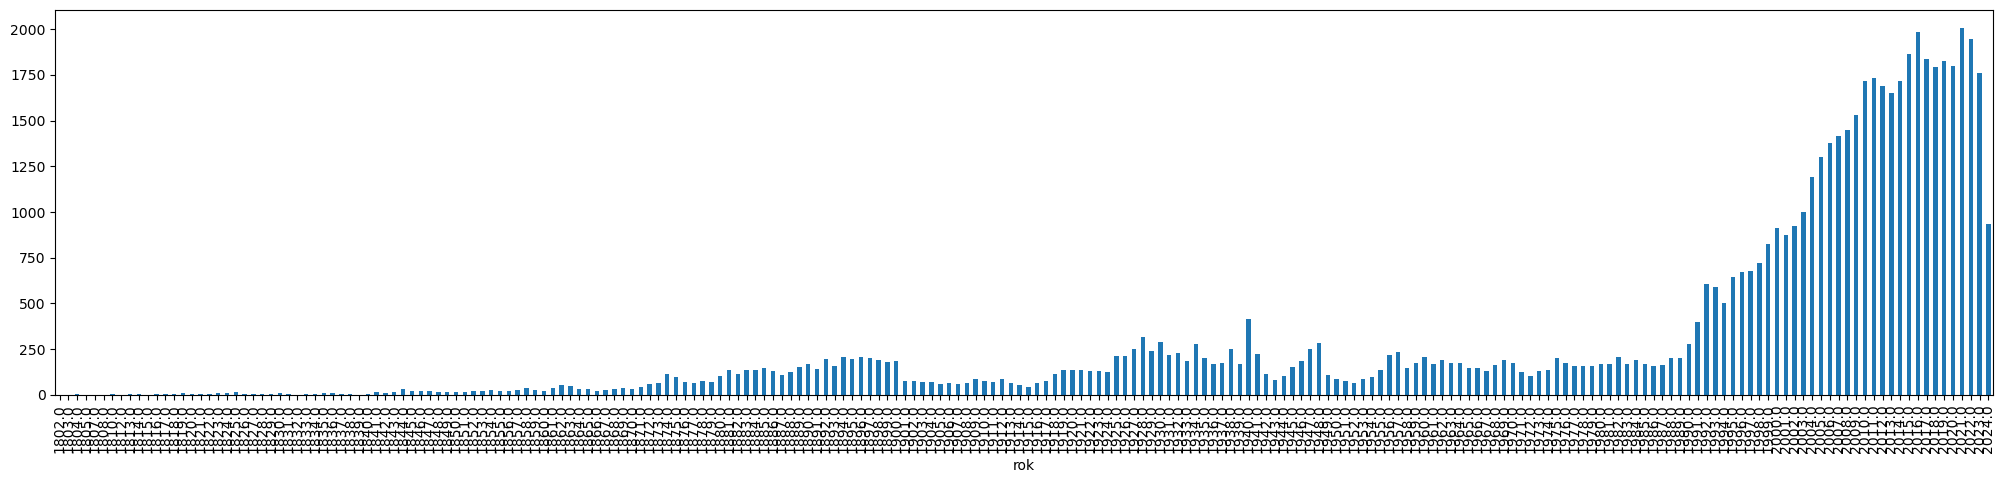

In [13]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [378]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [379]:
autority = autority.merge(pd.read_json(os.path.join('data_raw','wikidata_raw.json')), left_index=True, right_index=True, how="outer")

In [380]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [381]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [382]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [383]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [384]:
df['vek'] = df['rok'] - df['narozeni']

## Debutantstvo

In [386]:
debuty = df.groupby('autorstvo_kod')['rok'].min()

<Axes: xlabel='rok'>

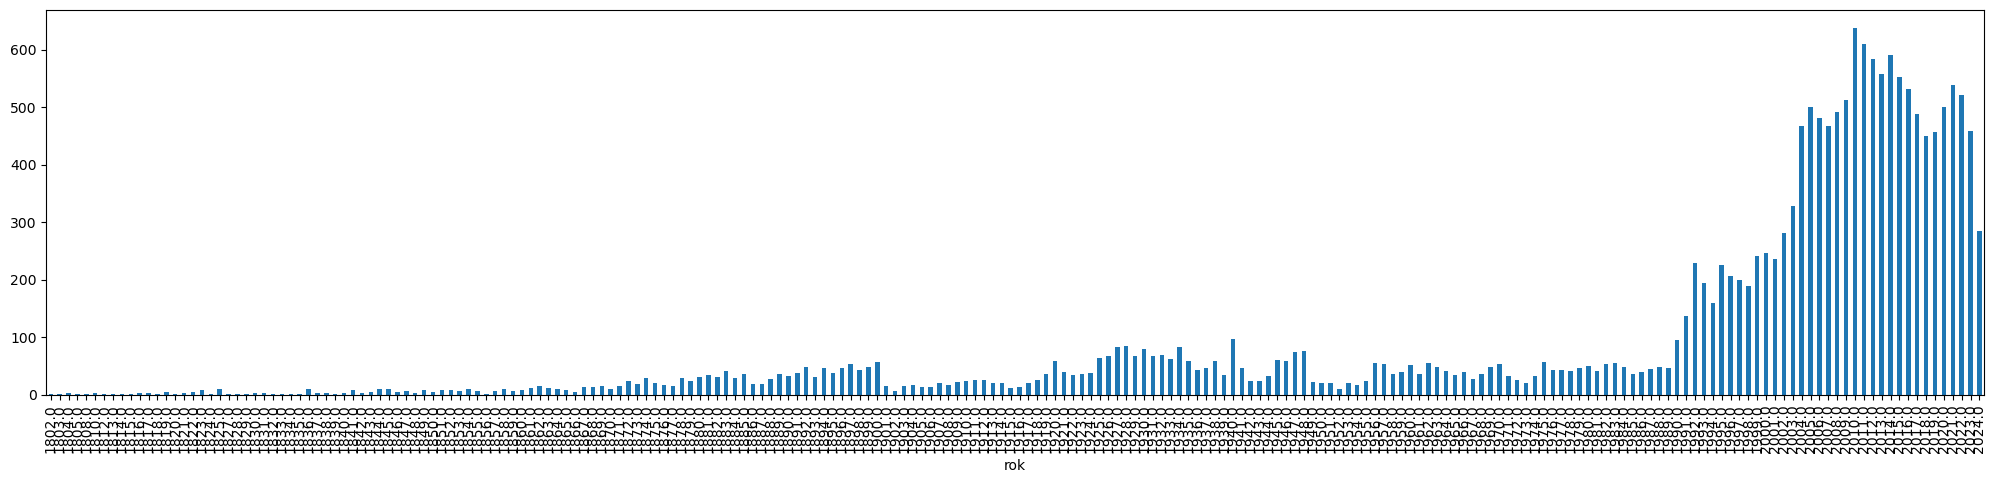

In [387]:
pd.DataFrame(debuty).groupby('rok').size().plot.bar(figsize=(25,5))

In [388]:
debuty.median()

2006.0

## Sledujeme jen knihy vydané zaživa

In [390]:
df = df[(df['rok'] <= df['umrti']) | ((df['umrti'].isnull()) & (df['rok'] > 1980) & (df['vek'] < 85))]

In [391]:
len(df)

48156

In [392]:
df[df['autorstvo'] == 'Mácha Karel Hynek']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041417516,1836.0,Mág,Mácha Karel Hynek,jk01072915,"[isni, wikidata]","[0000000121031971, Q361265]",[1810],[1836],[jk01072915],"[Mácha, Karel Hynek,]",[1810-1836],[1],None,"[Praha, Česko]","[Litoměřice, Česko]",[Česko],None,"[literární tvorba, poezie, próza]",None,"[spisovatelé, básníci, prozaici]",[muž],[cze],"[Maha,, Maha, Karäl Henek,]","[1810-1836, 1810-1836]",None,"[0, 1]",None,None,None,None,None,None,None,None,"[Narozen 16. 11. 1810 v Praze, zemřel 6. 11. 1...",None,cz a22 n 4500,Q361265,Karel Hynek Mácha,Karel Hynek Mácha,"Czech poet, traveller, playwright, lawyer and ...",1810.0,1836.0,m,"[Q131964, Q42585]",[Q1085],[Q384403],"[Q36180, Q49757, Q214917, Q3391743, Q12144794]","[ca, fr, az, lv, ru, cy, arz, zh, fa, sv, no, ...","český básník, cestovatel, dramatik, právník a ...",Q3739104,Q12090,None,None,[Q12047389],None,None,None,None,None,None,None,None,None,None,1810.0,1836.0,26.0


In [393]:
nepocitat = ['bk194801996','cpk20213304076']
kdejsme = 1855
while kdejsme < 2024:
    soucasnictvo = df[df['rok'] <= kdejsme]['autorstvo_kod'].drop_duplicates().to_list()
    kdebudeme = df[df['autorstvo_kod'].isin(soucasnictvo) & (~df.index.isin(nepocitat))]['rok'].max()
    budoucnictvo = df[(df['rok'] == kdebudeme) & (~df.index.isin(nepocitat)) & (df['autorstvo_kod'].isin(soucasnictvo))]['autorstvo'].to_list()
    print(f'Jsme v roce {int(kdejsme)} a {len(soucasnictvo)} lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku {int(kdebudeme)}, tedy dalších {int(kdebudeme-kdejsme)} let.\n(Šlo o tyto: {", ".join(budoucnictvo)}).', end="\n\n")
    kdejsme = kdebudeme

Jsme v roce 1855 a 182 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 1903, tedy dalších 48 let.
(Šlo o tyto: Kulda Beneš Metod).

Jsme v roce 1903 a 1173 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 1957, tedy dalších 54 let.
(Šlo o tyto: Bezruč Petr, Bezruč Petr, Bezruč Petr, Bezruč Petr, Bezruč Petr).

Jsme v roce 1957 a 2969 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 2020, tedy dalších 63 let.
(Šlo o tyto: Matouš Miroslav).

Jsme v roce 2020 a 12961 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 2024, tedy dalších 4 let.
(Šlo o tyto: Barták Daniel, Doskočilová Hana, Tesař Milan, Pacáková Jana, Šanda Michal, Mészáros Pavel, Votruba Václav, Maňák Vratislav, Matějka Antonín, Bláha Josef, Rožnovská Lenka, Dutková Dora, Beran Ladislav, Šedý Jiří, Niklíčková Alexandra, Hoňková Iva, Mikulka Alois, Blažková Kateřina, Johana Karel, Dvořáková Alžběta, Skoumal Filip, Keroušová Michaela, H

In [394]:
df[df['autorstvo'] == 'Štech Václav']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20021139882,1893.0,Maloměstský pepř,Štech Václav,jk01010145,"[isni, wikidata]","[0000000055397800, Q1312719]",[1859],[1947],[jk01010145],"[Štech, Václav,]",[1859-1947],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Aladin,, Dr. Hrachovina,, Homér český,, Ježík...","[1859-1947, 1859-1947, 1859-1947, 1859-1947, 1...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 29.4.1859 v Kladně, zemřel 23.2.1947 ...",None,cz a22 n 4500,Q1312719,Václav Štech,Václav Štech,"Czech theater manager, playwright and writer",1859.0,1947.0,m,[Q33946],"[Q155993, Q1744191]",[Q1085],"[Q36180, Q214917, Q487596, Q12144794, Q6051619]","[de, cs]","český divadelní ředitel, dramatik a spisovatel",None,None,None,None,None,None,None,[Q11863203],None,None,None,None,None,None,None,1859.0,1947.0,34.0
cpk20021181171,1896.0,Hloží,Štech Václav,jk01010145,"[isni, wikidata]","[0000000055397800, Q1312719]",[1859],[1947],[jk01010145],"[Štech, Václav,]",[1859-1947],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Aladin,, Dr. Hrachovina,, Homér český,, Ježík...","[1859-1947, 1859-1947, 1859-1947, 1859-1947, 1...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 29.4.1859 v Kladně, zemřel 23.2.1947 ...",None,cz a22 n 4500,Q1312719,Václav Štech,Václav Štech,"Czech theater manager, playwright and writer",1859.0,1947.0,m,[Q33946],"[Q155993, Q1744191]",[Q1085],"[Q36180, Q214917, Q487596, Q12144794, Q6051619]","[de, cs]","český divadelní ředitel, dramatik a spisovatel",None,None,None,None,None,None,None,[Q11863203],None,None,None,None,None,None,None,1859.0,1947.0,37.0
bknmik11430,1896.0,Koleje,Štech Václav,jk01010145,"[isni, wikidata]","[0000000055397800, Q1312719]",[1859],[1947],[jk01010145],"[Štech, Václav,]",[1859-1947],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Aladin,, Dr. Hrachovina,, Homér český,, Ježík...","[1859-1947, 1859-1947, 1859-1947, 1859-1947, 1...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 29.4.1859 v Kladně, zemřel 23.2.1947 ...",None,cz a22 n 4500,Q1312719,Václav Štech,Václav Štech,"Czech theater manager, playwright and writer",1859.0,1947.0,m,[Q33946],"[Q155993, Q1744191]",[Q1085],"[Q36180, Q214917, Q487596, Q12144794, Q6051619]","[de, cs]","český divadelní ředitel, dramatik a spisovatel",None,None,None,None,None,None,None,[Q11863203],None,None,None,None,None,None,None,1859.0,1947.0,37.0
cpk20021184767,1899.0,U tří bláznů,Štech Václav,jk01010145,"[isni, wikidata]","[0000000055397800, Q1312719]",[1859],[1947],[jk01010145],"[Štech, Václav,]",[1859-1947],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Aladin,, Dr. Hrachovina,, Homér český,, Ježík...","[1859-1947, 1859-1947, 1859-1947, 1859-1947, 1...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 29.4.1859 v Kladně, zemřel 23.2.1947 ...",None,cz a22 n 4500,Q1312719,Václav Štech,Václav Štech,"Czech theater manager, playwright and writer",1859.0,1947.0,m,[Q33946],"[Q155993, Q1744191]",[Q1085],"[Q36180, Q214917, Q487596, Q12144794, Q6051619]","[de, cs]","český divadelní 

In [395]:
df[df['autorstvo'] == 'Kramoliš Čeněk']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20071750622,1894.0,Bratři Doliňáci,Kramoliš Čeněk,jk01062877,"[isni, wikidata]","[0000000107185384, Q11171242]",[1862],[1949],[jk01062877],"[Kramoliš, Čeněk,]",[1862-1949],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Kramoliš, Vincenc,, Šilomark, Č.,, K., Čeněk,]","[1862-1949, 1862-1949, 1862-1949]","[None, Pseudonym:, Pseudonym:]","[1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 7. 12. 1862 v Rožnově pod Radhoštěm, ...",[http://cs.wikipedia.org/wiki/%C4%8Cen%C4%9Bk_...,cz a22 n 4500,Q11171242,Čeněk Kramoliš,Čeněk Kramoliš,Czech writer (1862-1949),1862.0,1949.0,m,[Q33946],[Q1008696],[Q14960],"[Q36180, Q37226, Q12347522, Q1595570, Q3330547]",[cs],český spisovatel (1862-1949),None,None,None,None,[Q66091802],None,None,None,None,None,None,None,None,None,None,1862.0,1949.0,32.0
nkc20081801378,1897.0,Tři valašské povídky,Kramoliš Čeněk,jk01062877,"[isni, wikidata]","[0000000107185384, Q11171242]",[1862],[1949],[jk01062877],"[Kramoliš, Čeněk,]",[1862-1949],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Kramoliš, Vincenc,, Šilomark, Č.,, K., Čeněk,]","[1862-1949, 1862-1949, 1862-1949]","[None, Pseudonym:, Pseudonym:]","[1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 7. 12. 1862 v Rožnově pod Radhoštěm, ...",[http://cs.wikipedia.org/wiki/%C4%8Cen%C4%9Bk_...,cz a22 n 4500,Q11171242,Čeněk Kramoliš,Čeněk Kramoliš,Czech writer (1862-1949),1862.0,1949.0,m,[Q33946],[Q1008696],[Q14960],"[Q36180, Q37226, Q12347522, Q1595570, Q3330547]",[cs],český spisovatel (1862-1949),None,None,None,None,[Q66091802],None,None,None,None,None,None,None,None,None,None,1862.0,1949.0,35.0
bknjje05549,1898.0,Obrázky z Valašska,Kramoliš Čeněk,jk01062877,"[isni, wikidata]","[0000000107185384, Q11171242]",[1862],[1949],[jk01062877],"[Kramoliš, Čeněk,]",[1862-1949],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Kramoliš, Vincenc,, Šilomark, Č.,, K., Čeněk,]","[1862-1949, 1862-1949, 1862-1949]","[None, Pseudonym:, Pseudonym:]","[1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 7. 12. 1862 v Rožnově pod Radhoštěm, ...",[http://cs.wikipedia.org/wiki/%C4%8Cen%C4%9Bk_...,cz a22 n 4500,Q11171242,Čeněk Kramoliš,Čeněk Kramoliš,Czech writer (1862-1949),1862.0,1949.0,m,[Q33946],[Q1008696],[Q14960],"[Q36180, Q37226, Q12347522, Q1595570, Q3330547]",[cs],český spisovatel (1862-1949),None,None,None,None,[Q66091802],None,None,None,None,None,None,None,None,None,None,1862.0,1949.0,36.0
nos190123171,1900.0,Z potulného života,Kramoliš Čeněk,jk01062877,"[isni, wikidata]","[0000000107185384, Q11171242]",[1862],[1949],[jk01062877],"[Kramoliš, Čeněk,]",[1862-1949],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Kramoliš, Vincenc,, Šilomark, Č.,, K., Čeněk,]","[1862-1949, 1862-1949, 1862-1949]","[None, Pseudonym:, Pseudonym:]","[1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 7. 12. 1862 v Rožnově pod Radhoštěm, ...",[http://cs.wikipedia.org/wiki/%C4%8Cen%C4%9Bk_...,cz a22 n 4500,Q11171242,Čeněk Kramoliš,Čeněk Kramoliš,Czech writer (1862-1949),1862.0,1949.0,m,[Q33946],[Q1008696],[Q14960],"[Q36180, Q37226, Q12347522, Q1595570, Q3330547]",[cs],český spisovatel (1862-1949),None,None,None,None,[Q66091802],None,None,None,None,None,None,None,None,None,None,1862.0,1949.0,38.0
nos190123161,1908.0,Drobty z Valašska na Moravě,Kramoliš Čeněk,jk01062877,"[isni, wikidata]","[0000000107185384, Q11171242]",[186

In [396]:
df[df['autorstvo'] == 'Kulda Beneš Metod']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknzdr16006,1852.0,Krásné večery,Kulda Beneš Metod,jk01070781,"[isni, wikidata]","[0000000066854544, Q4246529]",[1820],[1903],[jk01070781],"[Kulda, Beneš Metod,]",[1820-1903],[1],None,None,None,[Česko],None,None,None,None,None,None,"[B. M. K.,, Kul'da, Beneš Metodej,, Kulda, Ben...","[1820-1903, 1820-1903, 1820-1903, 1820-1903]","[None, None, None, Pseudonym:]","[0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 16.3.1820 v Ivančicích, zemřel 6.5.19...",None,cz a22 n 4500,Q4246529,Beneš Method Kulda,Beneš Metod Kulda,"Czech member of Czech council, ethnographer, r...",1820.0,1903.0,m,None,[Q1008686],"[Q21891843, Q1085]","[Q36180, Q12347522, Q250867, Q6051619, Q333634...","[cs, ru]","český katolický kněz, sběratel a vydavatel mor...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1820.0,1903.0,32.0
bknzdr16028,1858.0,Záhuba z pověry,Kulda Beneš Metod,jk01070781,"[isni, wikidata]","[0000000066854544, Q4246529]",[1820],[1903],[jk01070781],"[Kulda, Beneš Metod,]",[1820-1903],[1],None,None,None,[Česko],None,None,None,None,None,None,"[B. M. K.,, Kul'da, Beneš Metodej,, Kulda, Ben...","[1820-1903, 1820-1903, 1820-1903, 1820-1903]","[None, None, None, Pseudonym:]","[0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 16.3.1820 v Ivančicích, zemřel 6.5.19...",None,cz a22 n 4500,Q4246529,Beneš Method Kulda,Beneš Metod Kulda,"Czech member of Czech council, ethnographer, r...",1820.0,1903.0,m,None,[Q1008686],"[Q21891843, Q1085]","[Q36180, Q12347522, Q250867, Q6051619, Q333634...","[cs, ru]","český katolický kněz, sběratel a vydavatel mor...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1820.0,1903.0,38.0
cpk20011029078,1871.0,Radosti a žalosti papeže Pia IX,Kulda Beneš Metod,jk01070781,"[isni, wikidata]","[0000000066854544, Q4246529]",[1820],[1903],[jk01070781],"[Kulda, Beneš Metod,]",[1820-1903],[1],None,None,None,[Česko],None,None,None,None,None,None,"[B. M. K.,, Kul'da, Beneš Metodej,, Kulda, Ben...","[1820-1903, 1820-1903, 1820-1903, 1820-1903]","[None, None, None, Pseudonym:]","[0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 16.3.1820 v Ivančicích, zemřel 6.5.19...",None,cz a22 n 4500,Q4246529,Beneš Method Kulda,Beneš Metod Kulda,"Czech member of Czech council, ethnographer, r...",1820.0,1903.0,m,None,[Q1008686],"[Q21891843, Q1085]","[Q36180, Q12347522, Q250867, Q6051619, Q333634...","[cs, ru]","český katolický kněz, sběratel a vydavatel mor...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1820.0,1903.0,51.0
cpk20000974118,1874.0,"Moravské národní pohádky, pověsti, obyčeje a p...",Kulda Beneš Metod,jk01070781,"[isni, wikidata]","[0000000066854544, Q4246529]",[1820],[1903],[jk01070781],"[Kulda, Beneš Metod,]",[1820-1903],[1],None,None,None,[Česko],None,None,None,None,None,None,"[B. M. K.,, Kul'da, Beneš Metodej,, Kulda, Ben...","[1820-1903, 1820-1903, 1820-1903, 1820-1903]","[None, None, None, Pseudonym:]","[0, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 16.3.1820 v Ivančicích, zemřel 6.5.19...",None,cz a22 n 4500,Q4246529,Beneš Method Kulda,Beneš Metod Kulda,"Czech member of Czech council, ethnographer, r...",1820.0,1903.0,m,None,[Q1008686],"[Q21891843, Q1085]","[Q36180, Q12347522, Q250867, Q6051619, Q333634...","[cs, ru]","český katolický kněz, sběratel a vydavatel mor...",None,None,None,None,N

In [397]:
df[df['autorstvo'] == 'Vavřincová Fan']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193903380,1939.0,Patsy tropí hlouposti,Vavřincová Fan,jk01141829,None,None,[1917],[2012],[jk01141829],"[Vavřincová, Fan,]",[1917-2012],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Němotová, Věra,, Lorencová, Anna,]","[Skutečné jméno:, Pseudonym:]","[1, 1]",None,"[Narozena 17. 11. 1917 v Praze, zemřela 16. 12...",[http://cs.wikipedia.org/wiki/Fan_Vav%C5%99inc...,cz a22 n 4500,Q2756373,Fan Vavřincová,Fan Vavřincová,Czech writer and scriptwriter (1917-2012),1917.0,2012.0,f,"[Q33946, Q213]",[Q1085],None,"[Q36180, Q28389]","[arz, cs, en]",česká spisovatelka a scenáristka,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1917.0,2012.0,22.0
bk194104206,1941.0,Sladká dívka,Vavřincová Fan,jk01141829,None,None,[1917],[2012],[jk01141829],"[Vavřincová, Fan,]",[1917-2012],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Němotová, Věra,, Lorencová, Anna,]","[Skutečné jméno:, Pseudonym:]","[1, 1]",None,"[Narozena 17. 11. 1917 v Praze, zemřela 16. 12...",[http://cs.wikipedia.org/wiki/Fan_Vav%C5%99inc...,cz a22 n 4500,Q2756373,Fan Vavřincová,Fan Vavřincová,Czech writer and scriptwriter (1917-2012),1917.0,2012.0,f,"[Q33946, Q213]",[Q1085],None,"[Q36180, Q28389]","[arz, cs, en]",česká spisovatelka a scenáristka,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1917.0,2012.0,24.0
bk194301860,1943.0,Pozor! Zázračné dítě,Vavřincová Fan,jk01141829,None,None,[1917],[2012],[jk01141829],"[Vavřincová, Fan,]",[1917-2012],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Němotová, Věra,, Lorencová, Anna,]","[Skutečné jméno:, Pseudonym:]","[1, 1]",None,"[Narozena 17. 11. 1917 v Praze, zemřela 16. 12...",[http://cs.wikipedia.org/wiki/Fan_Vav%C5%99inc...,cz a22 n 4500,Q2756373,Fan Vavřincová,Fan Vavřincová,Czech writer and scriptwriter (1917-2012),1917.0,2012.0,f,"[Q33946, Q213]",[Q1085],None,"[Q36180, Q28389]","[arz, cs, en]",česká spisovatelka a scenáristka,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1917.0,2012.0,26.0
cpk20010736350,1944.0,Eva tropí hlouposti,Vavřincová Fan,jk01141829,None,None,[1917],[2012],[jk01141829],"[Vavřincová, Fan,]",[1917-2012],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Němotová, Věra,, Lorencová, Anna,]","[Skutečné jméno:, Pseudonym:]","[1, 1]",None,"[Narozena 17. 11. 1917 v Praze, zemřela 16. 12...",[http://cs.wikipedia.org/wiki/Fan_Vav%C5%99inc...,cz a22 n 4500,Q2756373,Fan Vavřincová,Fan Vavřincová,Czech writer and scriptwriter (1917-2012),1917.0,2012.0,f,"[Q33946, Q213]",[Q1085],None,"[Q36180, Q28389]","[arz, cs, en]",česká spisovatelka a scenáristka,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1917.0,2012.0,27.0
ck9205163,1991.0,Josefína,Vavřincová Fan,jk01141829,None,None,[1917],[2012],[jk01141829],"[Vavřincová, Fan,]",[1917-2012],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Němotová, Věra,, Lorencová, Anna,]","[Skutečné jméno:, Pseudonym:]","[1, 1]",None,"[Narozena 17. 11. 1917 v Praze, zemřela 16. 12...",[http://cs.wikipedia.org/wiki/Fan_Vav%C5%99inc...,cz a22 n 4500,Q2756373,Fan Vavřincová,Fan Vavřincová,Czech writer and scriptwriter (1917-2012),1917.0,2

## Nejdelší kariéry

In [399]:
(df.groupby("autorstvo_kod")['rok'].max() - df.groupby("autorstvo_kod")['rok'].min()).nlargest(20)

autorstvo_kod
jk01141829       69.0
jk01062651       66.0
jk01070894       66.0
jk01031485       65.0
jk01070958       65.0
jk01040997       64.0
jk01080765       64.0
jk01110657       64.0
jk01122896       63.0
jk01081647       62.0
jk01070892       61.0
jk01082552       61.0
jk01120891       61.0
jk01131979       61.0
jo19990047113    61.0
jk01042314       60.0
jk01071151       59.0
jk01102144       59.0
jk01110292       59.0
jk01121479       59.0
Name: rok, dtype: float64

In [400]:
delky_karier = pd.DataFrame(df.groupby("autorstvo_kod")['rok'].max() - df.groupby("autorstvo_kod")['rok'].min())
delky_karier = delky_karier.merge(df[['autorstvo_kod','autorstvo']].set_index('autorstvo_kod'), left_index=True, right_index=True, how='left')
delky_karier.sort_values(by='rok',ascending=False).drop_duplicates().head(60)

,rok,autorstvo
autorstvo_kod,,
jk01141829,69.0,Vavřincová Fan
jk01062651,66.0,Kožík František
jk01070894,66.0,Kundera Milan
jk01031485,65.0,Foglar Jaroslav
jk01070958,65.0,Kupka Jiří Svetozar
jk01110657,64.0,Seifert Jaroslav
jk01040997,64.0,Heyduk Adolf
jk01080765,64.0,Matouš Miroslav
jk01122896,63.0,Šiktanc Karel


In [401]:
delky_karier['rok'].median()

15.0

In [402]:
delky_karier['rok'].quantile([0.1,0.25,0.5,0.75,0.9])

0.10     0.0
0.25     4.0
0.50    15.0
0.75    28.0
0.90    40.0
Name: rok, dtype: float64

## Od Máje k Listopádu

In [404]:
nepocitat = ['bk194801996','cpk20213304076']
kdejsme = 1836
while kdejsme < 2024:
    soucasnictvo = df[df['rok'] <= kdejsme]['autorstvo_kod'].drop_duplicates().to_list()
    kdebudeme = df[df['autorstvo_kod'].isin(soucasnictvo) & (~df.index.isin(nepocitat))]['rok'].max()
    budoucnictvo = df[(df['rok'] == kdebudeme) & (~df.index.isin(nepocitat)) & (df['autorstvo_kod'].isin(soucasnictvo))]['autorstvo'].to_list()
    print(f'Jsme v roce {int(kdejsme)} a {len(soucasnictvo)} lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku {int(kdebudeme)}, tedy dalších {int(kdebudeme-kdejsme)} let.\n(Šlo o tyto: {", ".join(budoucnictvo)}).', end="\n\n")
    kdejsme = kdebudeme

Jsme v roce 1836 a 81 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 1889, tedy dalších 53 let.
(Šlo o tyto: Veselský Petr Miloslav).

Jsme v roce 1889 a 737 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 1948, tedy dalších 59 let.
(Šlo o tyto: Kvapil Jaroslav).

Jsme v roce 1948 a 2780 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 2008, tedy dalších 60 let.
(Šlo o tyto: Vavřincová Fan).

Jsme v roce 2008 a 8345 lidí vydalo v tomto roce nebo dříve prózu. Nejdéle aktivní byli do roku 2024, tedy dalších 16 let.
(Šlo o tyto: Barták Daniel, Šanda Michal, Mészáros Pavel, Matějka Antonín, Bláha Josef, Dutková Dora, Beran Ladislav, Šedý Jiří, Hoňková Iva, Mikulka Alois, Heteša Petr, Jakoubková Alena, Vondruška Vlastimil, Svobodová Iveta, Vičar Ivan, Štengl Petr, Pawlowská Halina, Bratršovská Zdena, Klimek Hynek, Heteša Petr, Niedl František, Daneš Martin, Gruber Václav, Černá Jaroslava, Jakoubková Alena, Klabouchová P

In [405]:
import plotly.express as px

In [406]:
cervi_diry = ['Veselský Petr Miloslav', 'Kvapil Jaroslav', 'Vavřincová Fan']

In [407]:
dirstvo = []
for c in cervi_diry:
    dira = {}
    dira['jméno'] = c
    dira['zacatek'] = f"{int(df[df['autorstvo'] == c]['rok'].min())}-01-01"
    dira['konec'] = f"{int(df[df['autorstvo'] == c]['rok'].max())}-12-31"
    dirstvo.append(dira)

In [408]:
dfx = pd.DataFrame(dirstvo)

In [409]:
dfx

,jméno,zacatek,konec
0,Veselský Petr Miloslav,1834-01-01,1889-12-31
1,Kvapil Jaroslav,1889-01-01,1948-12-31
2,Vavřincová Fan,1939-01-01,2008-12-31


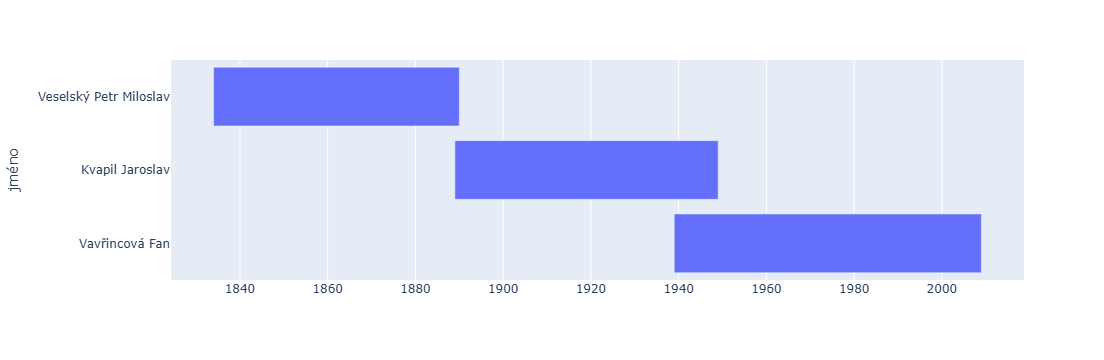

In [410]:
fig = px.timeline(dfx, x_start="zacatek", x_end="konec", y="jméno")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

<Axes: xlabel='rok', ylabel='autorstvo'>

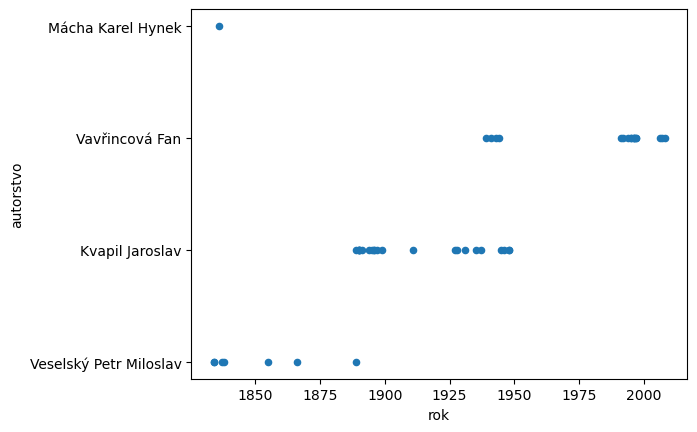

In [411]:
df[df['autorstvo'].isin(['Mácha Karel Hynek','Veselský Petr Miloslav','Kvapil Jaroslav','Vavřincová Fan'])].plot.scatter(x='rok',y='autorstvo')

## Od Máje k Listopádu II

Rozšíříme záběr na celé životy, nejen tvůrčí kariéry.

In [414]:
kdejsme = 1836
while kdejsme < 2024:
    soucasnictvo = df[df['narozeni'] < kdejsme]['autorstvo_kod'].drop_duplicates().to_list()
    kdebudeme = df[df['autorstvo_kod'].isin(soucasnictvo) & (~df.index.isin(nepocitat))]['umrti'].max()
    budoucnictvo = df[(df['umrti'] == kdebudeme) & (~df.index.isin(nepocitat)) & (df['autorstvo_kod'].isin(soucasnictvo))]['autorstvo'].drop_duplicates().to_list()
    print(f'Jsme v roce {int(kdejsme)} a {len(soucasnictvo)} lidí se narodilo před tímto rokem. Nejdéle žili do roku {int(kdebudeme)}, tedy dalších {int(kdebudeme-kdejsme)} let.\n(Šlo o tyto: {", ".join(budoucnictvo)}).', end="\n\n")
    kdejsme = kdebudeme

Jsme v roce 1836 a 351 lidí se narodilo před tímto rokem. Nejdéle žili do roku 1923, tedy dalších 87 let.
(Šlo o tyto: Heyduk Adolf).

Jsme v roce 1923 a 3435 lidí se narodilo před tímto rokem. Nejdéle žili do roku 2022, tedy dalších 99 let.
(Šlo o tyto: Steinová Dagmar, Fantlová Zdenka, Marek Eduard).

Jsme v roce 2022 a 14295 lidí se narodilo před tímto rokem. Nejdéle žili do roku 2024, tedy dalších 2 let.
(Šlo o tyto: Franková Hermína, Mikulka Alois, Janáčková Jaroslava, Hanibal Jiří, Man Lubomír, Fuchs Aleš, Bolgarin Igor‘ Jakovlevič, Schmid Jan, Hodrová Daniela, Erbová Karla, Štolbová Eva, Černík Michal, Urbanová Marta, Kosmas, Čermáková Jarmila Hannah, Jecho Evžen, DeMille Nelson, Korandová Marie, Blumfeld S. M., Čech Zdeněk, Simeon, Zajíček Pavel, Hykisch Anton, Žák Jiří, Seidlová Dana, Sýs Karel, Kačer Jan, Roupec Jiří, Urban Ivo, Halasová Dagmar, Kratěna Jaroslav, Janota Oldřich, Mager Jan Antonín, Merová Evelina, Velemínský Miloš, Oplt Ladislav, Laufer Josef, Černá Kateřina, 

In [415]:
autority.columns

Index(['024_2', '024_a_x', '046_f', '046_g', '100_7', '100_a', '100_d',
       '100_ind1', '110_a', '370_a', '370_b', '370_c', '370_f', '372_a',
       '373_a', '374_a', '375_a', '377_a', '400_a', '400_d', '400_i',
       '400_ind1', '410_a', '411_a', '430_a', '450_a', '500_a', '500_i',
       '500_ind1', '550_7', '678_a', '856_u', 'leader', '024_a_y', 'label_cs',
       'label_en', 'popis_en', 'w_narozeni', 'w_umrti', 'w_gender',
       'obcanstvi', 'w_misto_narozeni', 'w_misto_umrti', 'profese',
       'jazykove_verze', 'popis_cs', 'druh_umrti', 'pricina_umrti', 'vezeni',
       'strany', 'skoly', 'manzelstvo', 'partnerstvo', 'potomstvo',
       'sourozenectvo', 'facebook', 'twitter', 'instagram', 'web', 'udalosti',
       'role'],
      dtype='object')

In [416]:
autority.sample(10)

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role
ntk20201092440,"[orcid, isni, wikidata]","[0000-0002-6037-6873, 0000000083989942, Q39078...",[1949],None,[ntk20201092440],"[Atkins, P. J.]",[1949-],[1],None,None,None,[Velká Británie],None,"[historická geografie, potraviny, nápoje, soci...","[University of Durham, University College of S...","[geografové, vysokoškolští učitelé]",[muž],[eng],"[Atkins, Peter, Atkins, Peter J.,, Atkins, Pet...","[1949-, 1949-, 1949-, 1949-, 1949-]",None,"[1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,[Geograf a emeritní profesor v Department of G...,None,cz a22 n 4500,Q39078889,P. J. Atkins,Peter Atkins,English academic,1949.0,NaN,m,None,None,None,"[Q17486321, Q901402, Q1622272]",[en],None,None,None,None,None,[Q35794],None,None,None,None,None,None,None,None,None,None
jk01141182,None,None,None,None,[jk01141182],"[Vála, Stanislav]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Režisér, dramatické úpravy.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xx0167390,None,None,[1948],None,[xx0167390],"[Horenstein, Henry,]",[1948-],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Americký fotograf, pedagog a autor prací o fo...",[http://en.wikipedia.org/wiki/Henry_Horenstein],cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nlk20000091047,None,None,[1918],None,[nlk20000091047],"[Sedláček, Jan,]",[1918-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Nar. 1918. Fyziolog.],None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unn20201091513,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Östergren, Klas,]",[Předloha:],[1],None,[Švédský romatický thriller byl natočen v roce...,[https://www.csfd.cz/film/384977-gentlemen/pre...,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jn19990004339,None,None,[1910],[2003],[jn19990004339],"[Kindleberger, Charles Poor,]",[1910-2003],[1],None,None,None,None,None,None,None,None,None,None,"[Kindleberger, Charles P.]",[1910-2003],None,[1],None,None,None,None,None,None,None,None,"[Americký ekonom, byl zaměřený na ekonomické d...",None,cz a22 n 4500,Q1065713,Charles Poor Kindleberger,Charles Poor Kindleberger,American economic historian (1910-2003),1910.0,2003.0,m,[Q30],[Q60],[Q49111],"[Q188094, Q1622272]","[ru, en, uk, fr, hy, fa, sk, id, zh, arz, es, ...",None,None,None,None,None,"[Q49088, Q49117, Q6391891]",None,None,None,None,None,None,None,None,None,None
vut2013781218,None,None,None,None,[vut2013781218],"[Ive, Graham]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Ekonom, práce z oboru.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xx0085792,None,None,None,None,[xx0085792],"[Šmarin, Valerij Pavlovič]",None,[1],None,None,None,None,None,None,None,None,None,None,"[Šmarin, V.]",None,None,[1],None,None,None,None,None,None,None,None,"[Ing., autor odborných jazykových textů pro po.

In [417]:
tvurcovstvo = df['autorstvo_kod'].drop_duplicates().to_list()

In [418]:
len(autority)

1210199

In [419]:
autority = autority.explode('100_7')

In [420]:
len(autority)

1210199

In [421]:
autority[(autority['w_narozeni'] < 1923) & (autority['w_umrti'].isnull()) & (autority['046_g'].isnull()) & (autority['100_7'].isin(tvurcovstvo))].sort_values(by='w_narozeni',ascending=False)

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role
jk01030892,None,None,[1922],None,jk01030892,"[Fencl, Jaroslav,]",[1922-],[1],None,"[Nalžovice, Česko]",None,[Česko],None,"[literatura, literatura pro děti a mládež]",None,"[pedagogové, spisovatelé]",[muž],[cze],"[Fencl, Jaroslav T.,]",[1922-],None,[1],None,None,None,None,None,None,None,None,"[Narozen 11. 6. 1922 v Nalžovicích. Pedagog, d...",None,cz a22 n 4500,Q95362156,Jaroslav Fencl,Jaroslav Fencl,None,1922.0,NaN,m,None,[Q924855],None,"[Q1231865, Q36180]",[],"Narozen 11.6.1922 v Nalžovicích. Pedagog, dram...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
jk01092433,None,None,[1922],None,jk01092433,"[Pelcová, Ludmila,]",[1922-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 30.10.1922 v Banské Štiavnici (Slove...,None,nz a22 n 4500,Q95436703,Ludmila Pelcová,Ludmila Pelcová,None,1922.0,NaN,f,None,[Q208110],None,[Q36180],[],Narozena 30.10.1922 v Banské Štiavnici (Sloven...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
jk01131989,None,None,[1922],None,jk01131989,"[Táborský, Jiří,]",[1922-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Novinář, překlady z ruštiny, cestopis.]",None,cz a22 n 4500,Q112350142,Jiří Táborský,None,None,1922.0,NaN,m,None,None,None,[Q1930187],[],"novinář, překlady z ruštiny, cestopis",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
mzk2004252223,None,None,[1922],None,mzk2004252223,"[Plšková, Emilie,]",[1922-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 20.8.1922 v Praze. Spisovatelka.],None,nz a22 n 4500,Q95178026,Emilie Plšková,Emilie Plšková,Czechoslovak writer,1922.0,NaN,f,[Q33946],[Q1085],None,[Q36180],[],Narozena 20.8.1922 v Praze. Spisovatelka.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
jn19990218081,None,None,[1922],None,jn19990218081,"[Palka, Jiří,]",[1922-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1922. Reverend, duchovní literatura.]",None,nz a22 n 4500,Q112351662,Jiří Palka,None,None,1922.0,NaN,m,None,None,None,None,[],"Narozen 1922. Reverend, duchovní literatura.",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
jk01040749,None,None,[1921],None,jk01040749,"[Henryková, Jitka,]",[1921-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 13. 3. 1921 v Praze, žije ve Švýcars...",None,cz a22 n 4500,Q95070501,Jitka Henryková,Jitka Henryková,None,1921.0,NaN,f,[Q33946],[Q1085],None,"[Q12144794, Q2518689, Q36180]",[],"Narozena 13. 3. 1921 v Praze, žije ve Švýcarsk...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
xx0012853,None,None,[1921],None,xx0012853,"[Vandas, Jiří J.,]",[1921-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 1921 ve Svatém Poli u Dobříše. Ing. e...,None,cz a22 n 4500,Q112380102,Jiří J. Vandas,None,None,1921.0,NaN,m,None,None,None,[Q36180],[],Narozen 1921 ve Svatém Poli u Dobříše. Ing. ek...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
xx0006157,None,None,[1921],None,xx0006157,"[Chvojková, Marie,]",[1921-],[1],None,None,None,[Česko],None,Non

## Mimo: města

In [423]:
mesta_narozeni = df[df['rok'] >= 1924][['100_a','370_a']].explode('100_a').explode('370_a')
mesta_narozeni.groupby('370_a').size().nlargest(60)

370_a
Praha, Česko                        4166
Brno, Česko                          878
Plzeň, Česko                         488
České Budějovice, Česko              374
Ostrava, Česko                       235
Olomouc, Česko                       231
Kladno, Česko                        227
Písek, Česko                         212
Hradec Králové, Česko                196
Prostějov, Česko                     191
Ústí nad Labem, Česko                181
Jičín, Česko                         174
Zlín, Česko                          174
Opava, Česko                         170
Chomutov, Česko                      167
Příbram, Česko                       164
Pardubice, Česko                     147
Tábor, Česko                         144
Havlíčkův Brod, Česko                139
Kolín, Česko                         127
Liberec, Česko                       125
Teplice, Česko                       116
Benešov, Česko                       111
Jihlava, Česko                       109
Litomyšl, 

In [424]:
mesta_umrti = df[df['rok'] >= 1924][['100_a','370_b']].explode('100_a').explode('370_b')
mesta_umrti.groupby('370_b').size().nlargest(60)

370_b
Praha, Česko                            2147
Brno, Česko                              249
Olomouc, Česko                           118
Plzeň, Česko                              62
Paříž, Francie                            53
Dobříš, Česko                             52
Mariánské lázně, Česko                    51
Toronto, Ontario                          50
Brandýs nad Labem, Česko                  48
Domažlice, Česko                          38
Vsetín, Česko                             37
Hranice, Přerov, Česko                    36
Ostrava, Česko                            29
České Budějovice, Česko                   29
Třeboň, Česko                             27
Boskovice, Česko                          23
Dobřichovice, Česko                       22
Čerčany, Česko                            21
Třebíč, Česko                             20
Kladno, Česko                             19
Liberec, Česko                            17
Lisabon, Portugalsko                      17
Měln

## Ještě máj

In [474]:
df[df['titul'] == 'Mág']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,label_cs,label_en,popis_en,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,popis_cs,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,facebook,twitter,instagram,web,udalosti,role,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041417516,1836.0,Mág,Mácha Karel Hynek,jk01072915,"[isni, wikidata]","[0000000121031971, Q361265]",[1810],[1836],[jk01072915],"[Mácha, Karel Hynek,]",[1810-1836],[1],None,"[Praha, Česko]","[Litoměřice, Česko]",[Česko],None,"[literární tvorba, poezie, próza]",None,"[spisovatelé, básníci, prozaici]",[muž],[cze],"[Maha,, Maha, Karäl Henek,]","[1810-1836, 1810-1836]",None,"[0, 1]",None,None,None,None,None,None,None,None,"[Narozen 16. 11. 1810 v Praze, zemřel 6. 11. 1...",None,cz a22 n 4500,Q361265,Karel Hynek Mácha,Karel Hynek Mácha,"Czech poet, traveller, playwright, lawyer and ...",1810.0,1836.0,m,"[Q131964, Q42585]",[Q1085],[Q384403],"[Q36180, Q49757, Q214917, Q3391743, Q12144794]","[ca, fr, az, lv, ru, cy, arz, zh, fa, sv, no, ...","český básník, cestovatel, dramatik, právník a ...",Q3739104,Q12090,None,None,[Q12047389],None,None,None,None,None,None,None,None,None,None,1810.0,1836.0,26.0
